<a href="https://colab.research.google.com/github/KarenMoralesJ/Data-Science-Project/blob/main/Proyecto_DS_Deserci%C3%B3n_Karen_Morales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PREDICCIÓN DE LOS FACTORES QUE INFLUYEN EN LA DESERCIÓN DE PERSONAL EN IBM**

##ABSTRACT

Durante los últimos años las empresas de tecnología se ven cada vez más afectadas debido al alto porcentaje de rotación de personal que presentan. Efectos negativos que podría estar relacionados con la satisfacción laboral, la cultura organizacional, trayectoria profesional, o simplemente mejores oportunidades laborales en el mercado.

Este análisis busca identificar y predecir combinaciones de factores que podrían estar relacionados a las tasas significativas de la rotación de personal buscando brindar estrategias que generen oportunidades para el crecimiento de la tasa de retención para la compañía IBM quien ha sido seleccionado para este trabajo.

###Objetivos Específicos

* Analizar los factores que influyen en la rotación de personal.

* Evaluar la relación entre variables clave y la deserción de empleados.

* Comparar tendencias y patrones de rotación a lo largo del tiempo.

* Desarrollar un modelo predictivo de rotación de empleados.

###Hipotesis

Se determinan las siguientes 3 hipótesis que afectarían la deserción personal durante el periodo 2012 - 2020:

1. Tasa de deserción mayor o igual al 35%
2. Salarios poco atractivos
3. Pocas oportunidades de crecimiento para altos cargos o personas con mayor tiempo en la compañía.
4. Carga laboral.

##CONTEXTO COMERCIAL

International Business Machines Corporation (IBM) es una empresa tecnológica multinacional estadounidense con sede en Armonk, Nueva York. IBM fabrica y comercializa hardware y software para computadoras, y ofrece servicios de infraestructura, alojamiento de Internet, y consultoría en una amplia gama de áreas relacionadas con la informática, desde computadoras centrales hasta nanotecnología.

##PROBLEMA COMERCIAL

Explorar los datos obtenidos y proporcionar visualizaciones que respondan a las siguientes preguntas:

1. La tasa de deserción aumentó para los últimos dos (2) años?
2. La tasa de deserción está concentrada en un área en específica?
3. El % de overtime es alto? Y como afecta a la carga laboral?
4. EL salario podría ser el factor principal de la deserción del personal?

##ADQUISICIÓN DE DATOS

El dataset utilizado fue obtenido a través de Kaggle y contiene variables categóricas y numéricas para 1,470 empleados únicos de IBM en Estados Unidos, junto con la información sobre si han renunciado o no, datos recopilados durante el periodo de 2012 a 2022.

In [447]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


*A continuación importación y visualización de los datos, archivo excel:*

In [449]:
import pandas as pd
File_Path = '/content/gdrive/MyDrive/My Courses/Data Science Course/Data Science I/CausasDeLaDeserciónDelPersonalDeIBM_Karen Morales.xlsx'
df = pd.read_excel(File_Path)
df.head (10)

,ID Empleado,Nombre,Apellido,Genero,Edad,Viaje de Negocios,Area,Distancia desde Casa (KM),Estado,Etnia,...,Salario,OverTime,Fecha de Contrato,Nivel de Desempeño,Deserción,# Capacitación último año,Años en la Compañía,Años ültimo Rol,Años desde la última promo,Años con actual Manager
0,3012-1A41,Leonelle,Simco,Femenino,30,Some Travel,Sales,27,IL,White,...,102059,No,2012-01-03,3,No,0,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Masculino,38,Some Travel,Sales,23,CA,White,...,157718,Yes,2012-01-04,4,No,3,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Masculino,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,309964,No,2012-01-04,3,No,3,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,No-Binario,39,Some Travel,Technology,12,IL,White,...,293132,No,2012-01-05,3,No,3,10,10,10,0
4,42CC-040A,Stace,Savege,Femenino,29,Some Travel,Human Resources,29,CA,White,...,49606,No,2012-01-05,3,Yes,3,10,1,1,6
5,C219-6C2E,Clerkclaude,Hinkins,Masculino,34,Some Travel,Sales,30,NY,Mixed or multiple ethnic groups,...,133468,No,2012-01-05,3,No,2,10,3,7,9
6,D906-B674,Uta,Melmar,Femenino,42,No Travel,Technology,45,NY,Black or African American,...,259284,No,2012-01-09,4,No,3,10,2,6,6
7,3C7D-86ED,Joyan,Brason,Femenino,40,Some Travel,Sales,3,CA,Native Hawaiian,...,104426,No,2012-01-11,4,No,2,10,3,4,6
8,3D71-8DC2,Alix,Blazejewski,Masculino,38,Some Travel,Sales,20,IL,Black or African American,...,147098,No,2012-01-11,4,No,2,10,5,8,2
9,5476-CA0D,Kayley,Snoad,Femenino,31,Frequent Traveller,Technology,4,NY,Native Hawaiian,...,69747,No,2012-01-12,3,Yes,3,10,5,5,1


In [450]:
df.describe(include="all")

,ID Empleado,Nombre,Apellido,Genero,Edad,Viaje de Negocios,Area,Distancia desde Casa (KM),Estado,Etnia,...,Salario,OverTime,Fecha de Contrato,Nivel de Desempeño,Deserción,# Capacitación último año,Años en la Compañía,Años ültimo Rol,Años desde la última promo,Años con actual Manager
count,1470,1470,1470,1470,1470.000000,1470,1470,1470.000000,1470,1470,...,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,1470,1334,1441,4,NaN,3,3,NaN,3,7,...,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,3012-1A41,Murdock,Ponten,Femenino,NaN,Some Travel,Technology,NaN,CA,White,...,NaN,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
freq,1,3,2,675,NaN,1043,961,NaN,875,860,...,NaN,1054,NaN,NaN,1233,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,28.989796,NaN,NaN,22.502721,NaN,NaN,...,112956.497959,NaN,2017-07-05 14:50:26.938775296,3.153741,NaN,2.799320,4.962585,2.293197,3.440816,2.239456
min,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,1.000000,NaN,NaN,...,20387.000000,NaN,2012-01-03 00:00:00,3.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,23.000000,NaN,NaN,12.000000,NaN,NaN,...,43580.500000,NaN,2014-07-10 06:00:00,3.000000,NaN,2.000000,2.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,26.000000,NaN,NaN,22.000000,NaN,NaN,...,71199.500000,NaN,2017-09-02 00:00:00,3.000000,NaN,3.000000,5.000000,1.000000,3.000000,1.000000
75%,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,33.000000,NaN,NaN,...,142055.750000,NaN,2020-05-14 18:00:00,3.000000,NaN,3.000000,8.000000,4.000000,6.000000,4.000000
max,NaN,NaN,NaN,NaN,51.000000,NaN,NaN,45.000000,NaN,NaN,...,547204.000000,NaN,2022-12-31 00:00:00,4.000000,NaN,6.000000,10.000000,10.000000,10.000000,10.000000


In [451]:
df.columns

Index(['ID Empleado', 'Nombre', 'Apellido', 'Genero', 'Edad',
       'Viaje de Negocios', 'Area', 'Distancia desde Casa (KM)', 'Estado',
       'Etnia', 'Educación', 'Rol', 'Estado Marital', 'Salario', 'OverTime',
       'Fecha de Contrato', 'Nivel de Desempeño', 'Deserción',
       '# Capacitación último año', 'Años en la Compañía', 'Años ültimo Rol',
       'Años desde la última promo', 'Años con actual Manager'],
      dtype='object')

*Agregación*
1. Agregamos una nueva columna cuantitativa **Deserción Count** a partir de la columna cualitativa **Deserción**
2. Agremos una nueva columna cuantitativa **Year** a partir de columna tipo fecha **Fecha de Contrato**

In [452]:
df['Deserción Count'] = df['Deserción'].map({'Yes': 1, 'No': 0})
df['Year'] = df['Fecha de Contrato'].dt.year

In [453]:
grouped_df = df.groupby('Year')['Deserción Count'].sum().reset_index()

In [454]:
grouped_df.head(11)

,Year,Deserción Count
0,2012,24
1,2013,23
2,2014,23
3,2015,15
4,2016,24
5,2017,11
6,2018,22
7,2019,21
8,2020,28
9,2021,21


###Descripción de Variables

*Variables Imput*

1. ID Empleado: Número asignado al empleado por la compañía
2. Género: Género del empleado
3. Edad: Edad de empleado
4. Viaje de negocios: Frecuencia de los viajes de negocio del empleado
5. Área: Departamento donde se desempeña el empleado
6. Estado: Estado donde reside el empleado
8. Etnia: Etnia con la que se identifica el empleado
9. Educación: Campo de estudio del empleado
10. Rol: Título de trabajo Rol en el que se desempeña el empleado
11. Estado Marital: Estado civil del empleado
12. Salario: Ingreso anual del empleado
13. Overtime: ¿Los empleados trabajan horas extra?
14. Fecha de contratación: Fecha de inicio
15. Deserción: ¿El empleado deja la organización?
16. Años en la compañía: Número de años que los empleados han estado en la empresa

*Otras Variables*

17. Nombre: Primer nombre del empleado
18. Apellido: Apellido del empleado
19. Distancia desde casa: Distancia desde casa al trabajo en millas
20. Nivel de Desempeño: Calificación del
rendimiento Calificación de desempeño del empleado
21. No. capacitación en el último año: Número de veces que los empleados recibieron capacitación en el último año
22. Años rol actual: Número de años que el empleado ha estado en su rol
actual
23. Número de años con su gerente actual: Número de años que un empleado ha estado con su
gerente actual

##EXPLORACIÓN ANALÍTICA DE DATOS

In [455]:
df.shape

(1470, 25)

Se confirma que el dataset seleccionado posee 1470 filas y 25 columnas. Esto significa que tenemos 24 características, 1 objetivo (binario) para investigar. Además, información de 1470 personas diferentes.:

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID Empleado                 1470 non-null   object        
 1   Nombre                      1470 non-null   object        
 2   Apellido                    1470 non-null   object        
 3   Genero                      1470 non-null   object        
 4   Edad                        1470 non-null   int64         
 5   Viaje de Negocios           1470 non-null   object        
 6   Area                        1470 non-null   object        
 7   Distancia desde Casa (KM)   1470 non-null   int64         
 8   Estado                      1470 non-null   object        
 9   Etnia                       1470 non-null   object        
 10  Educación                   1470 non-null   object        
 11  Rol                         1470 non-null   object      

Así mismo se identifica el tipo de variable; numéricas y/o  categóricas, y se determina que no existen valores nulos como se muestra a continuación.

In [457]:
df.isnull(). sum()

,0
ID Empleado,0
Nombre,0
Apellido,0
Genero,0
Edad,0
Viaje de Negocios,0
Area,0
Distancia desde Casa (KM),0
Estado,0
Etnia,0


###VISUALIZACIÓN DE DATOS

Se desarrollan las siguientes gráficas para  probar o refutar las hipótesis planteadas anteriormente.

**Gráfico 1. Total Desertados a la Fecha**

Gráfico de barras en donde se observa el total de desertados que se obtuvo durante los años 2012 a 2022 Resultado de una tasa de deserción no mayor al 27%, tasa promedio por año. Dicho lo anterior, nuestra primera hipótesis queda anulada y se refuta que la tasa está con un 8% por debajo de lo que se habia planteado.

In [458]:
df.Deserción.value_counts()

,count
Deserción,
No,1233
Yes,237


Text(0.5, 1.0, 'Total Desertados a la Fecha')

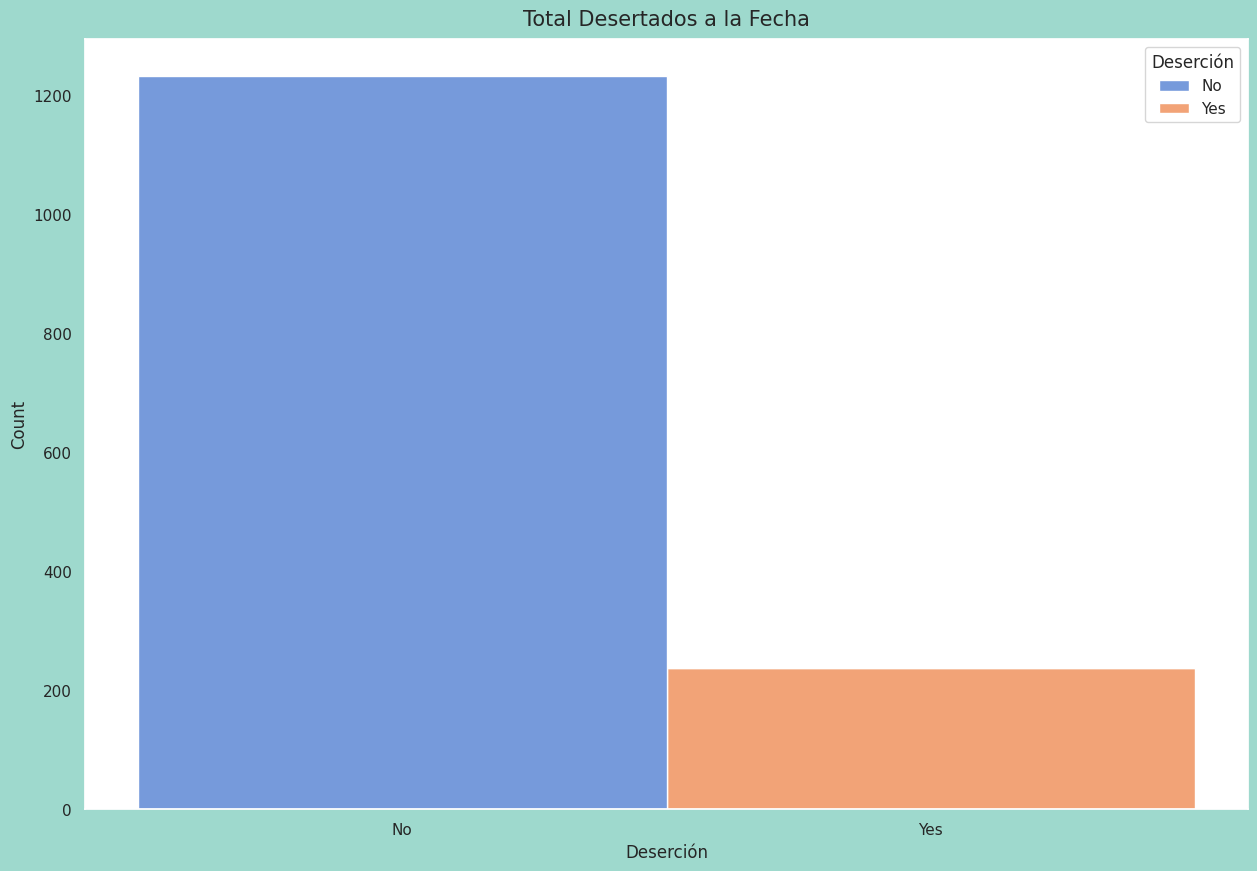

In [459]:
from types import new_class
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

sns.set(rc={"axes.facecolor":"white","figure.facecolor":"#9ed9cd"})
sns.set_palette("muted")
sns.histplot(data=df, x= 'Deserción', hue= "Deserción", multiple= "stack")
plt.title("Total Desertados a la Fecha", size=15,pad=10)

**Gráfico 2. Tendencia Deserción por Año**

Para el siguiente gráfico lineal se muestra la tendencia de la deserción del personal durante el periodo 2012 - 2022. Se observa una baja para los años 2021. y 2022 frente al 2020, siendo el año con mayor tasa de deserción. Sin embargo, se necesita detallar otras caracteristicas para comprobar cuales fueron han sido los factores que están promomiviendo la rotación en IBM.

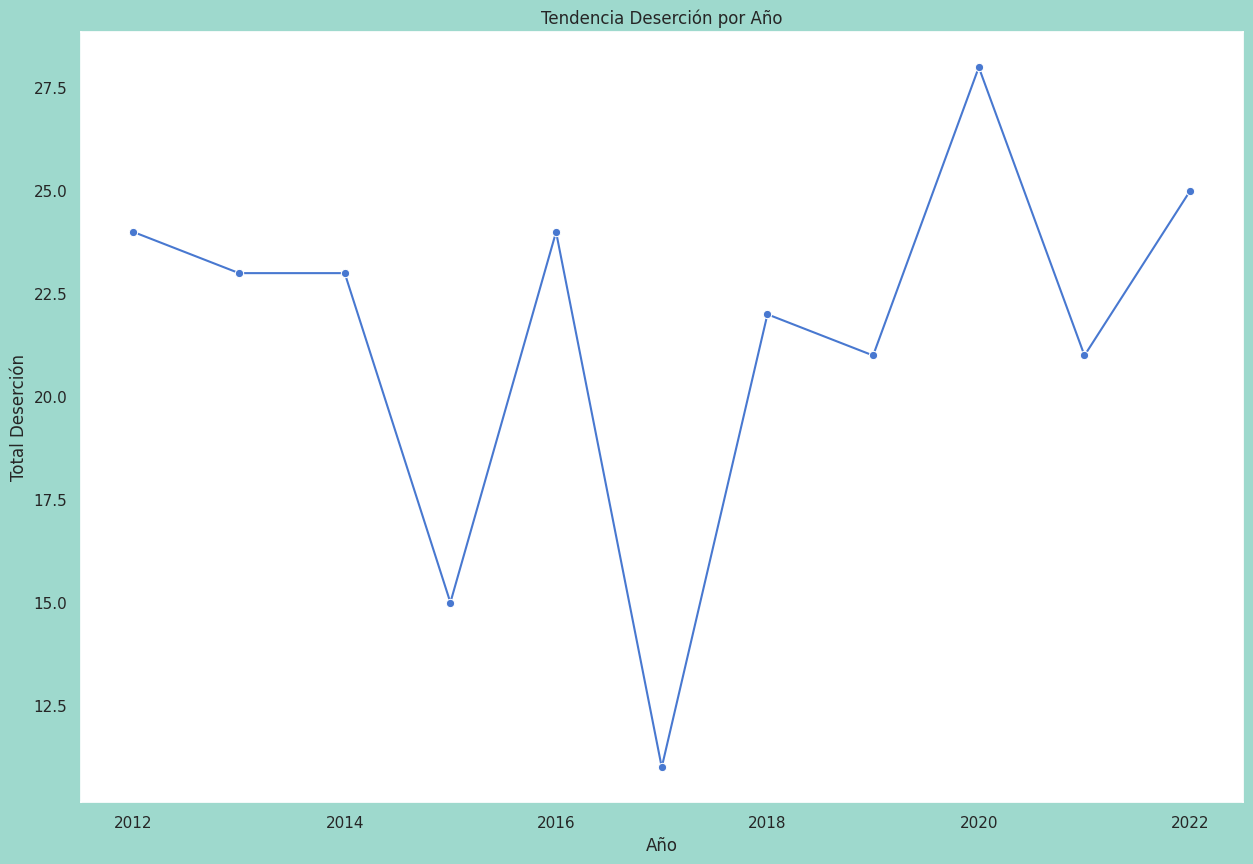

In [460]:
sns.lineplot(x='Year', y='Deserción Count', data=grouped_df, marker='o')
plt.title('Tendencia Deserción por Año')
plt.xlabel('Año')
plt.ylabel('Total Deserción')
plt.show()

**Gráfico 3. Desertados por Área**

Gráfico de barras. Este gráfico podría ayudarnos a responder la pregunta "¿La tasa de deserción está concentrada en un área en específica?" y a refutar la primera y segunda hipótesis, es decir, si la deserción de empleados está relacionada con el salario o pocas oportunidades de crecimiento.

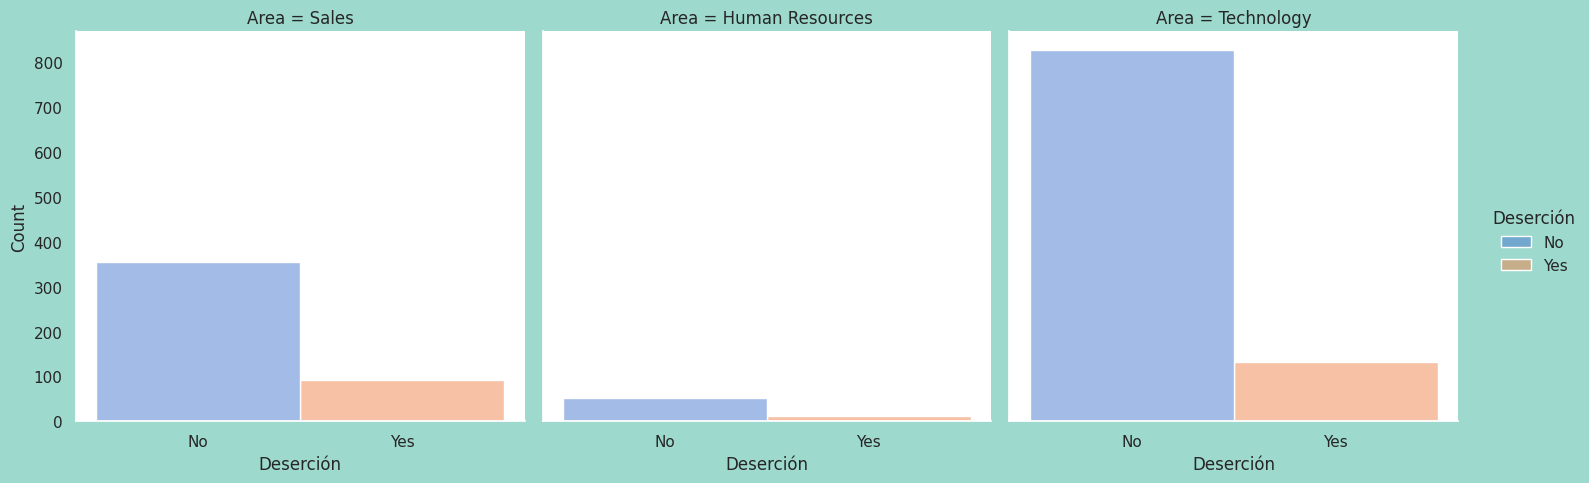

In [461]:
sns.displot(data=df, x="Deserción", hue="Deserción", col="Area")
sns.set_palette("muted")

**Gráfico 4. Deserción por OverTime**

Gráfico de barras. Este gráfico contribuye al análisis de la deserción frente al tiempo extra trabajado por los empleados durante el periodo 2012-2022. Con este gráfico respondemos a la pregunta "El % de overtime es alto? Y como afecta a la carga laboral?" En donde se muestra que las personas que continuan en la compañía, realizado más tiempo extra que aquellos que desertaron. No obstante, se tendría que analizar otros factores para determinar si el overtime sería una de los factores principales para la carga laboral.

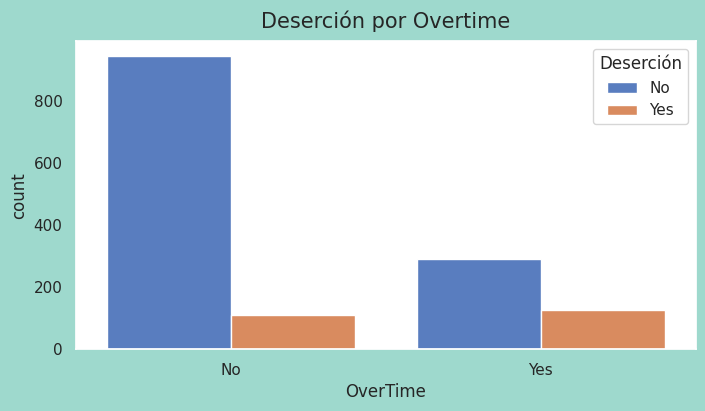

In [462]:
plt.figure(figsize=(8,4))
sns.countplot(x="OverTime", hue="Deserción", data=df)
plt.title("Deserción por Overtime",size=15,pad=10)
sns.set_palette("muted")
plt.show()

**Gráfico 5. Deserción por Edad por Género por Salario**

Gráfico de Dispersión. En esta gráfica se observa la relación de las categorías Edad, Género, y Salario con la deserción que tuvo la compañía durante el periodo. Vemos que el género masculino posee el mayor porcentaje de deserción sobre los otros géneros, siendo el  entre el rango de edad de 25 a 35 años.

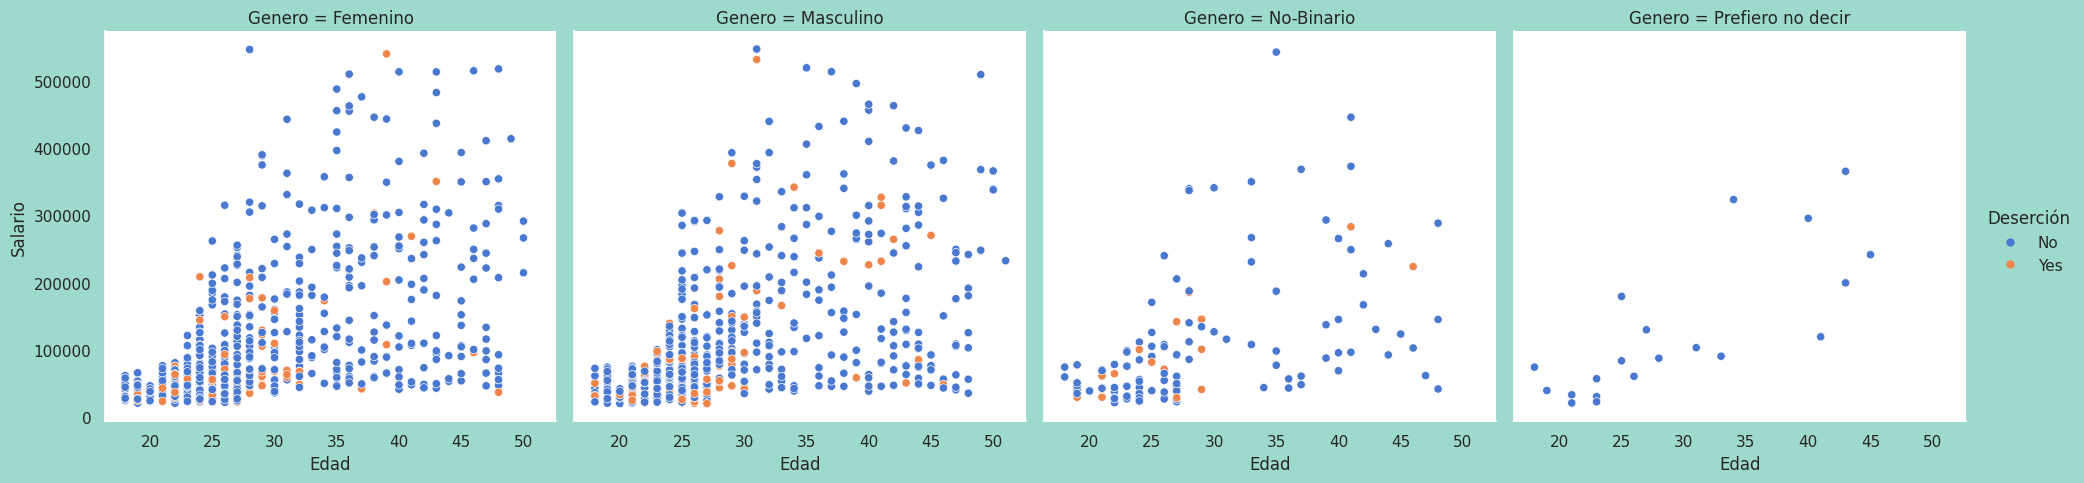

In [463]:
sns.relplot(data=df, y="Salario", x="Edad", hue="Deserción",col='Genero')
plt.show()

###ANÁLISIS DE LA CORRELACIÓN Y REDUCCIÓN DE LA DIMENSIONALIDAD DE DATOS




In [464]:
columnas = ['Genero','Edad','Area','Salario','OverTime','Nivel de Desempeño','Años en la Compañía','Deserción']

df_2 = df[columnas]

In [465]:
df_2.head(10)

,Genero,Edad,Area,Salario,OverTime,Nivel de Desempeño,Años en la Compañía,Deserción
0,Femenino,30,Sales,102059,No,3,10,No
1,Masculino,38,Sales,157718,Yes,4,10,No
2,Masculino,43,Human Resources,309964,No,3,10,No
3,No-Binario,39,Technology,293132,No,3,10,No
4,Femenino,29,Human Resources,49606,No,3,10,Yes
5,Masculino,34,Sales,133468,No,3,10,No
6,Femenino,42,Technology,259284,No,4,10,No
7,Femenino,40,Sales,104426,No,4,10,No
8,Masculino,38,Sales,147098,No,4,10,No
9,Femenino,31,Technology,69747,No,3,10,Yes


**Codificar variable categórica**

Realizamos una transformación de datos a nuestro Dataset el cuál contiene variables numericas y categoricas, aplicando el metodo de "encoding" debido a que las variables categoricas no estan transformadas a numero binario 0 o 1.

In [466]:
df_2.loc [:,'Genero'] = LabelEncoder().fit_transform(df_2['Genero'])
df_2.loc [:,'Area'] = LabelEncoder().fit_transform(df_2['Area'])
df_2.loc [:,'OverTime'] = LabelEncoder().fit_transform(df_2['OverTime'])
df_2.loc [:,'Deserción'] = LabelEncoder().fit_transform(df_2['Deserción'])
df_2.loc [:,'Nivel de Desempeño'] = LabelEncoder().fit_transform(df_2['Nivel de Desempeño'])

In [467]:
X = df_2.drop(columns=['Deserción'])
y = df_2['Deserción']

**Gráfico 6. Matriz de Correlación**

A continuación mostramos un Heatmap de las variables seleccionadas donde se detalla la siguiente correlación:

*   Los ingresos mensuales están altamente correlacionados con el nivel de desempeño.
*   La edad también se correlaciona con el total de horas overtime.
*   El género están correlacionados negativamente con el 70% de los factores relacionados.

In [468]:
import plotly.express as px

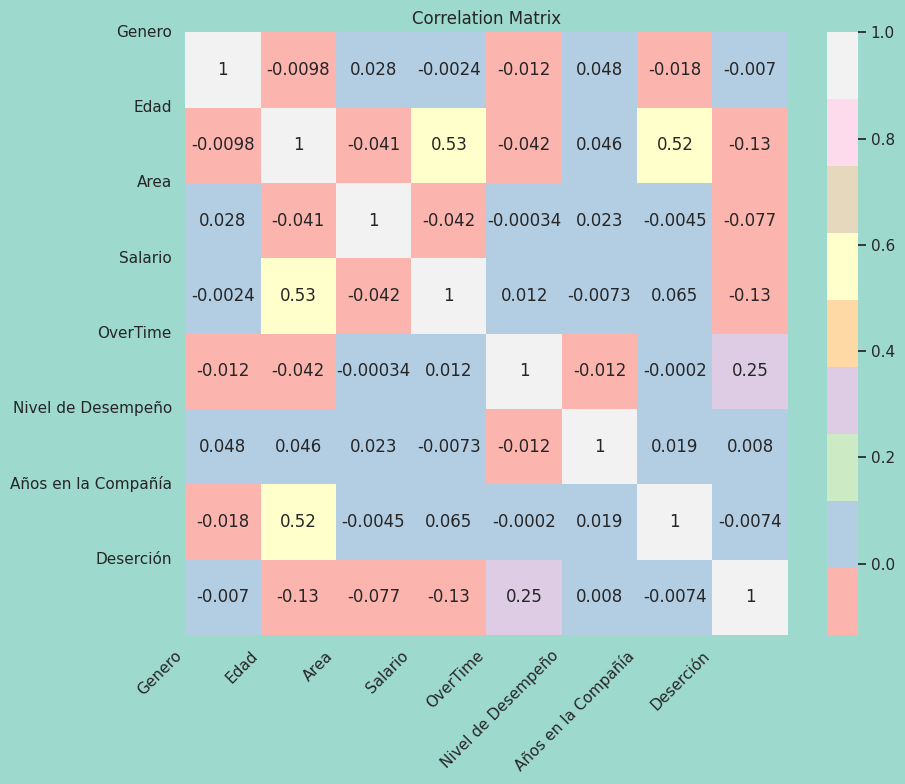

In [469]:
corrmat = df_2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, annot = True, cmap='Pastel1')
plt.imshow(corrmat, cmap='Pastel1', interpolation='nearest')
plt.xticks(range(len(columnas)), columnas, rotation=45, ha='right')
plt.yticks(range(len(columnas)), columnas)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

###ENTRENAMIENTO Y EVALUACIÓN DE DESEMPEÑO DEL MODELO

Por el tipo de variables que tenemos en nuestra Dataset, y ser una variable de clasificacion la que tenemos que predecir (Deserción), elegimos un Algoritmo de clasificacion, para evaluar la performance de nuestro modelo aplicado. Se usó el DecisionTreeClassifier para aplicar la "Matriz de Confusion".

In [470]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree


In [471]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

clasificador = DecisionTreeClassifier(max_depth=3)
clasificador.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

***Ejecutar Predicciones***

In [472]:
y_pred = clasificador.predict(X_test)

In [473]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [474]:
y_test

,Deserción
1041,1
184,0
1222,1
67,0
220,0
...,...
567,0
560,1
945,0
522,0


In [475]:
confusion_matrix(y_test, y_pred)

array([[239,   1],
       [ 53,   1]])

In [476]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       240
           1       0.50      0.02      0.04        54

    accuracy                           0.82       294
   macro avg       0.66      0.51      0.47       294
weighted avg       0.76      0.82      0.74       294



*Para tener un dato más detallado de la acertividad del modelo, a continuación se detallan los resultados de cuatro métricas:*

In [477]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [478]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Accuracy: 0.8163265306122449
Precision: 0.5
Recall: 0.018518518518518517
F1: 0.03571428571428571


###Anexo - Arbol de desición

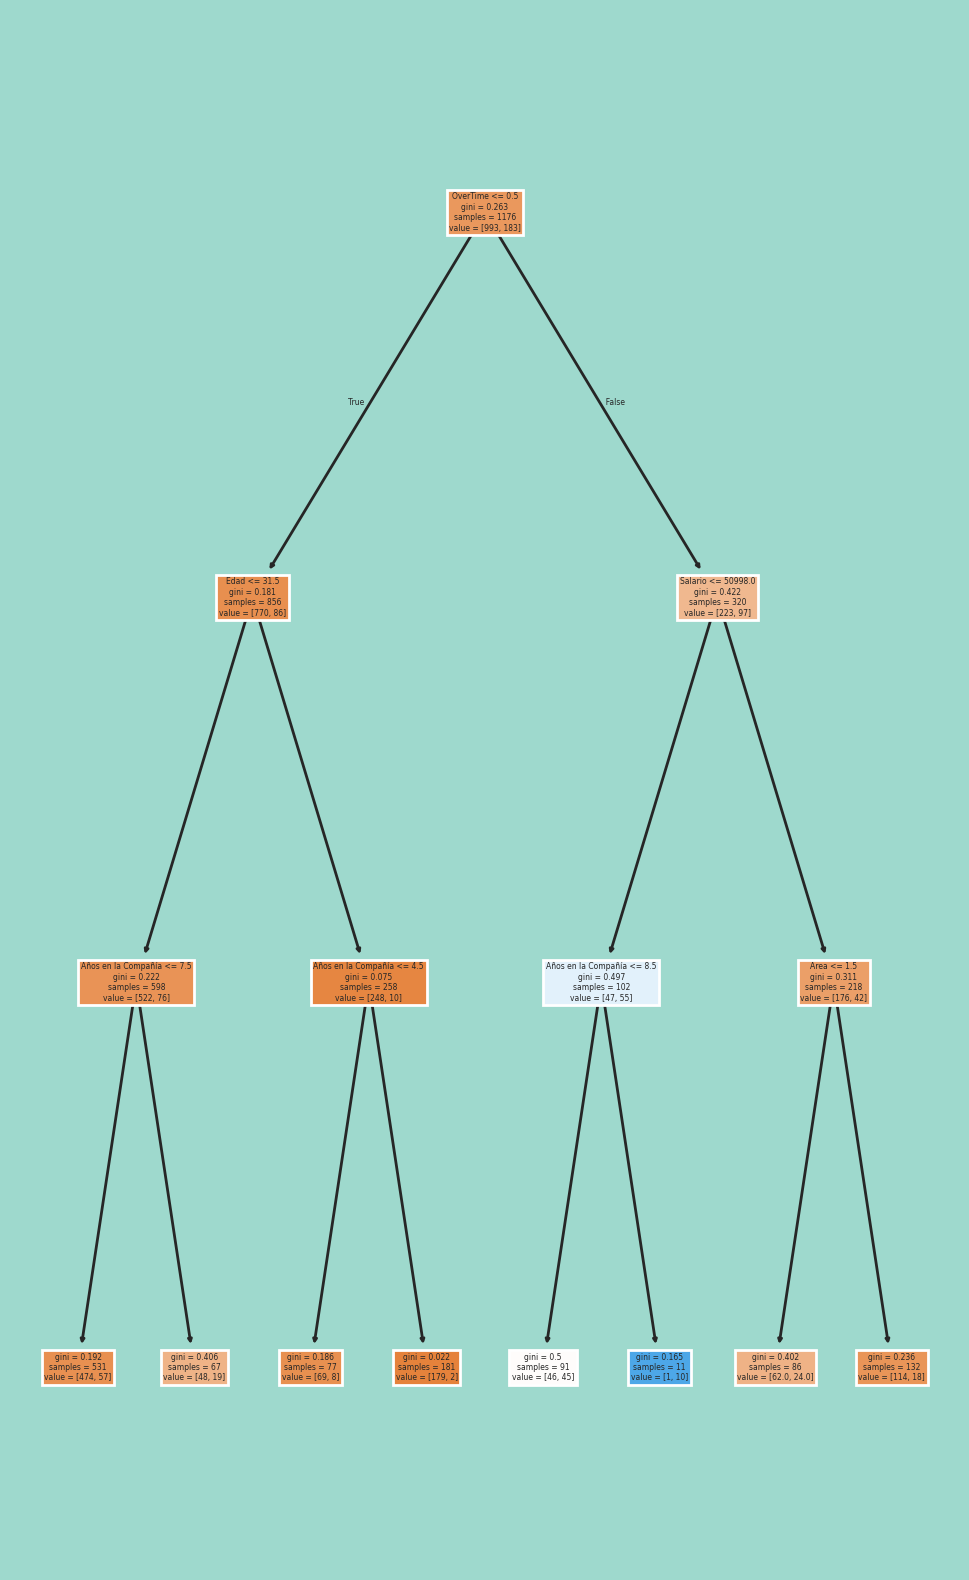

In [479]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(6,10), dpi=200)
_ = tree.plot_tree(clasificador, feature_names = df_2.columns.values.tolist()[:-1],filled=True)
# plt.savefig('arbol.png')

###OBSERVACIÓN

En este análisis, encontramos que entre las mujeres, la mayor rotación se produjo en el departamento de Recursos Humanos. Entre los ex empleados, se encontró que el salario estaba por debajo de los $30,000 y que la mayoria de los desertados estaban dentro del rango de edad de 20 - 35 años. Las variables que no resultaron significativas para determinar si un empleado se fue o no incluyen su nivel educativo, calificación de desempeño y años en la compañía.

Según la importancia de las características del modelo, la edad, el género, los ingresos, y el nivel de trabajo se encontraban entre los predictores más influyentes del desgaste de los empleados. Con estas características, nuestro modelo pudo predecir la probabilidad de que un empleado abandonara la empresa sea a nivel salarial o de desempeño del 81,63% tanto para el conjunto de validación como para el conjunto de prueba. Para optimizar aún más el modelo, se podría incorporar información adicional sobre los empleados que dejaron la empresa como la etnia o nivel educativo o implementar técnicas de muestreo ponderado para abordar de manera más efectiva el desequilibrio de clases en el conjunto de datos.